# P2: Investigate a Database
- **Analysis of Titanic Data
- **Neo Xing 2016/11**
- References
    - Data from [Kagge: Titanic: Machine Learning from Disaster](https://www.kaggle.com/c/titanic)
    - [Kaggle: Exploratory Tutorial - Titanic](https://www.kaggle.com/arthurlu/titanic/exploratory-tutorial-titanic)
    - [Kaggle: A Journey through Titanic](https://www.kaggle.com/omarelgabry/titanic/a-journey-through-titanic/comments)

## Questions
### 1. What are the most important factors for survival rate?
- For example, Pclass or Fare means wealth, Sex and Age may imply the physical strength, SibSp or Parch may relate with family background.

### 2. What is the profile of the person most likely to survive?
- For example, 1st class passenger who is children or female travelling with family.

## Data Exploration

In [61]:
import pandas as pd
from pandas import Series,DataFrame
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')

from IPython.display import display
%matplotlib inline
plt.rcParams['figure.figsize'] = 10, 8

In [62]:
titanic_df = pd.read_csv("./train.csv", dtype={"Age": np.float64})

# test data is used for Kaggle prediction task
test_df = pd.read_csv("./test.csv", dtype={"Age": np.float64})

In [63]:
print("Train data preview")
display(titanic_df.head())

print("\nTrain data info\n" + "-" * 40)
titanic_df.info()

print("\nTest data preview")
display(test_df.head())

print("\nTest data info\n" + "-" * 40)
test_df.info()

Train data preview


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S



Train data info
----------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB

Test data preview


,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S



Test data info
----------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            332 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-null object
Fare           417 non-null float64
Cabin          91 non-null object
Embarked       418 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


### Variable Descriptions

```
survival        Survival
                (0 = No; 1 = Yes)
pclass          Passenger Class
                (1 = 1st; 2 = 2nd; 3 = 3rd)
name            Name
sex             Sex
age             Age
sibsp           Number of Siblings/Spouses Aboard
parch           Number of Parents/Children Aboard
ticket          Ticket Number
fare            Passenger Fare
cabin           Cabin
embarked        Port of Embarkation
                (C = Cherbourg; Q = Queenstown; S = Southampton)
```

## Data Wrangling

- `PassengerId`, `Name` and `Ticket` are not used for prediction
- `Embarked` can be dropped since it has the least logical relationship with survival rate
- For simplicity, `SibSp` and `Parch` will be merged to single number of `Family` on board

### Drop unused data

In [64]:
## Drop data
# drop unused columns
titanic_df = titanic_df.drop(['PassengerId','Name','Ticket'], axis=1)
test_df    = test_df.drop(['Name','Ticket'], axis=1)

# drop column `Cabin` as >70% are missing
titanic_df.drop("Cabin",axis=1,inplace=True)
test_df.drop("Cabin",axis=1,inplace=True)

### Fix missing data

In [65]:
## Fix test data, replacing by random sampled value from train data
fare_train_data = titanic_df['Fare'].dropna()
test_df['Fare'].fillna(fare_train_data.sample().values[0], inplace=True)
age_train_data = titanic_df['Age'].dropna()
test_df['Age'].fillna(age_train_data.sample().values[0], inplace=True)

## Fix train data, drop rows missing Embarked and Age
titanic_df.dropna(axis=0, inplace=True)

### Merge columns

In [66]:
# Merge `SibSp` and `Parch` into single column of `Family` member number
titanic_df['Family'] = titanic_df['SibSp'] + titanic_df['Parch']
titanic_df.drop(['SibSp','Parch'], axis=1, inplace=True)

test_df['Family'] = test_df['SibSp'] + test_df['Parch']
test_df.drop(['SibSp','Parch'], axis=1, inplace=True)

### Preprocessed data

In [67]:
print("Train data preview")
display(titanic_df.head())

print("\nTrain data info\n" + "-" * 40)
titanic_df.info()

print("\nTrain data stats\n" + "-" * 40)
display(titanic_df.describe())

print("\nTest data preview")
display(test_df.head())

print("\nTest data info\n" + "-" * 40)
test_df.info()

print("\nTest data stats\n" + "-" * 40)
display(test_df.describe())

Train data preview


,Survived,Pclass,Sex,Age,Fare,Embarked,Family
0,0,3,male,22.0,7.2500,S,1
1,1,1,female,38.0,71.2833,C,1
2,1,3,female,26.0,7.9250,S,0
3,1,1,female,35.0,53.1000,S,1
4,0,3,male,35.0,8.0500,S,0



Train data info
----------------------------------------
<class 'pandas.core.frame.DataFrame'>
Int64Index: 712 entries, 0 to 890
Data columns (total 7 columns):
Survived    712 non-null int64
Pclass      712 non-null int64
Sex         712 non-null object
Age         712 non-null float64
Fare        712 non-null float64
Embarked    712 non-null object
Family      712 non-null int64
dtypes: float64(2), int64(3), object(2)
memory usage: 44.5+ KB

Train data stats
----------------------------------------


,Survived,Pclass,Age,Fare,Family
count,712.000000,712.000000,712.000000,712.000000,712.000000
mean,0.404494,2.240169,29.642093,34.567251,0.946629
std,0.491139,0.836854,14.492933,52.938648,1.485027
min,0.000000,1.000000,0.420000,0.000000,0.000000
25%,0.000000,1.000000,20.000000,8.050000,0.000000
50%,0.000000,2.000000,28.000000,15.645850,0.000000
75%,1.000000,3.000000,38.000000,33.000000,1.000000
max,1.000000,3.000000,80.000000,512.329200,7.000000



Test data preview


,PassengerId,Pclass,Sex,Age,Fare,Embarked,Family
0,892,3,male,34.5,7.8292,Q,0
1,893,3,female,47.0,7.0000,S,1
2,894,2,male,62.0,9.6875,Q,0
3,895,3,male,27.0,8.6625,S,0
4,896,3,female,22.0,12.2875,S,2



Test data info
----------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 7 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Sex            418 non-null object
Age            418 non-null float64
Fare           418 non-null float64
Embarked       418 non-null object
Family         418 non-null int64
dtypes: float64(2), int64(3), object(2)
memory usage: 22.9+ KB

Test data stats
----------------------------------------


,PassengerId,Pclass,Age,Fare,Family
count,418.000000,418.000000,418.000000,418.000000,418.000000
mean,1100.500000,2.265550,30.216507,35.586902,0.839713
std,120.810458,0.841838,12.635016,55.846575,1.519072
min,892.000000,1.000000,0.170000,0.000000,0.000000
25%,996.250000,1.000000,23.000000,7.895800,0.000000
50%,1100.500000,3.000000,30.000000,14.454200,0.000000
75%,1204.750000,3.000000,35.750000,31.471875,1.000000
max,1309.000000,3.000000,76.000000,512.329200,10.000000


## Data Analysis

### Histogram of survival vs feature
#### Patterns of single feature
- 3rd (Pclass=3) class passengers have lowest survival rate
- Female passengers have larger survival rate
- Young adult (Age 20-40) passengers make up the most of population, while ranges of 20-30 and >60 have lowest survival rate
- Passengers with low Fare (< 40) have lowest survival rate, they also make up the most of population
- Passengers Embarked at C have larger survival rate
- Passengers with 1-3 Family have larger survival rate

In [8]:
# visualization utils
from visualizations import survival_stats, plot_survival_rate

Titanic data Histograms of Survived vs. feature
Features ['Pclass' 'Sex' 'Age' 'Fare' 'Embarked' 'Family']


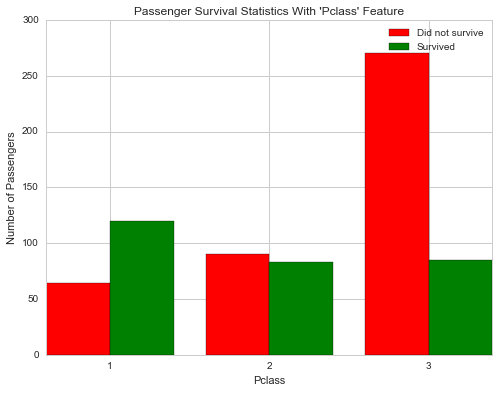

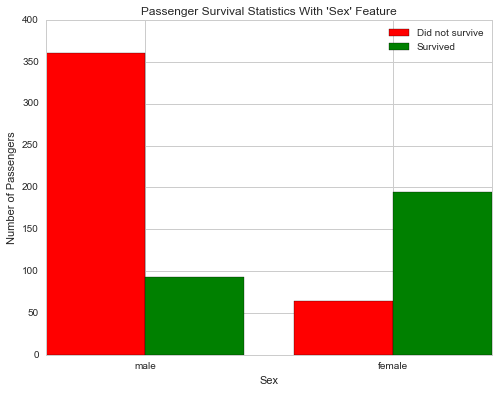

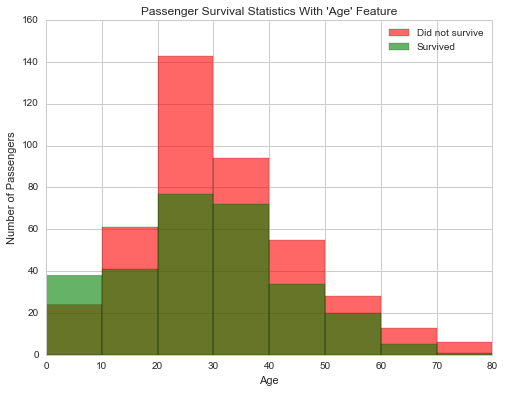

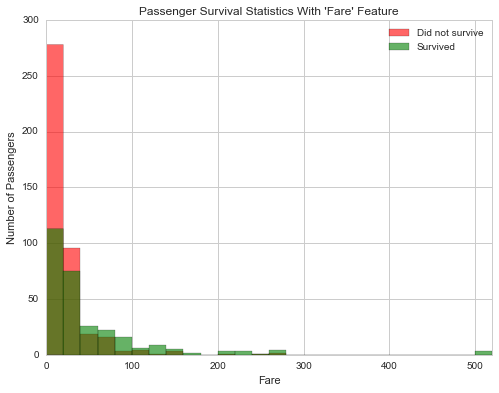

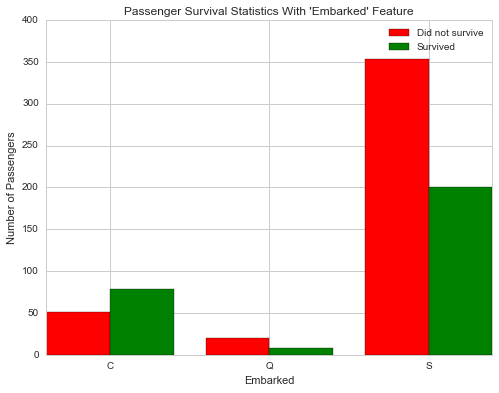

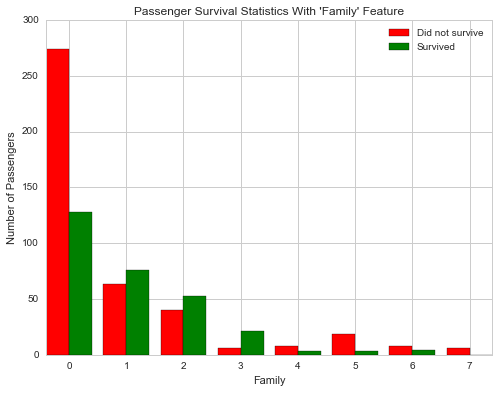

In [9]:
features = titanic_df.columns.values[1:]
print "Titanic data Histograms of Survived vs. feature"
print "Features", features
for feature in features:
    survival_stats(titanic_df, feature)

### Top features
- Use Random Forest Classifier to learn features of most importance
- Top features are `Sex`, `Fare`, `Pclass`

In [32]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import make_scorer

def get_model(estimator, parameters, X_train, y_train, scoring):  
    model = GridSearchCV(estimator, param_grid=parameters, scoring=scoring)
    model.fit(X_train, y_train)
    return model.best_estimator_

In [68]:
## data preprocessing
# one hot encoding for Sex (male/female 0/1) and Embarked (C/Q/S 0/1/2)
titanic_df['Sex'] = titanic_df['Sex'].apply(lambda x: int(x == 'male'), convert_dtype=np.int)
titanic_df['Embarked'] = titanic_df['Embarked'].apply(lambda x: 'CQS'.index(x), convert_dtype=np.int)

# data for evaluation
test_df['Sex'] = test_df['Sex'].apply(lambda x: int(x == 'male'), convert_dtype=np.int)
test_df['Embarked'] = test_df['Embarked'].apply(lambda x: 'CQS'.index(x), convert_dtype=np.int)

# split train data
X = titanic_df.drop(['Survived'], axis=1)
y = titanic_df['Survived']
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [69]:
scoring = make_scorer(mean_absolute_error, greater_is_better=False)
rfc = RandomForestClassifier(random_state=42, criterion='entropy', min_samples_split=5, oob_score=True)
parameters = {'n_estimators':[500], 'min_samples_leaf':[12]}
clf_rfc1 = get_model(rfc, parameters, X_train, y_train, scoring)

In [70]:
print(accuracy_score(y_test, clf_rfc1.predict(X_test)))
print(clf_rfc1)

0.792134831461
RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=12,
            min_samples_split=5, min_weight_fraction_leaf=0.0,
            n_estimators=500, n_jobs=1, oob_score=True, random_state=42,
            verbose=0, warm_start=False)


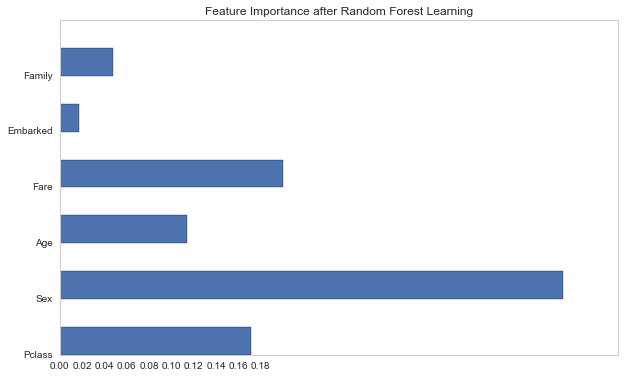

In [75]:
# Feature Importance
plt.figure(figsize=(10,6))
plt.title("Feature Importance after Random Forest Learning")
plt.barh(np.arange(X_train.columns.shape[0]), clf_rfc1.feature_importances_, 0.5)
plt.yticks(np.arange(X_train.columns.shape[0]), X_train.columns)
plt.grid()
plt.xticks(np.arange(0,0.2,0.02));

In [112]:
features = pd.DataFrame({'Importance': pd.Series(clf_rfc1.feature_importances_, dtype=np.float),
                         'Feature': pd.Series(X_train.columns.values)})
features.sort_values(by='Importance', ascending=False, inplace=True)
display(features)

,Feature,Importance
1,Sex,0.450564
3,Fare,0.199545
0,Pclass,0.170984
2,Age,0.114020
5,Family,0.047582
4,Embarked,0.017305


### Detailed study of top features
- Plot of Survived Probability Density vs feature
- Top features seem to be `Age`, `Fare`, `Family` based on previous histograms and Random Forest Classifier
- The profile of most probable surviver is a 1st class female passenger aged at 27

Top features ['Sex' 'Fare' 'Pclass' 'Age' 'Family' 'Embarked']


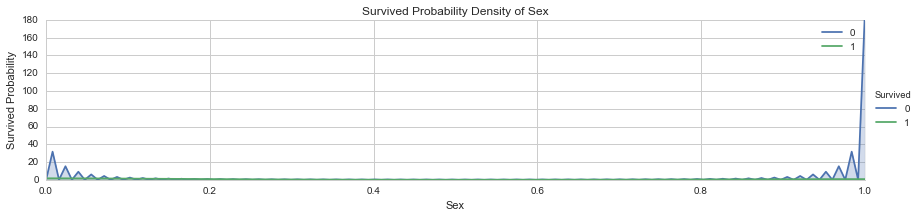

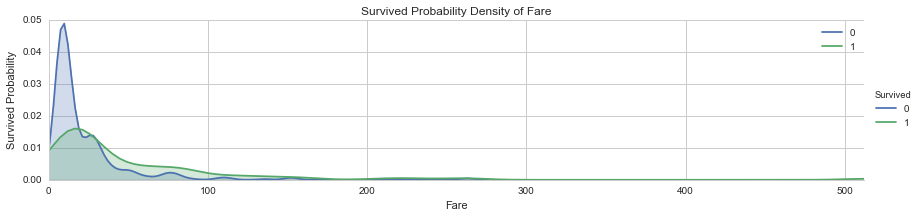

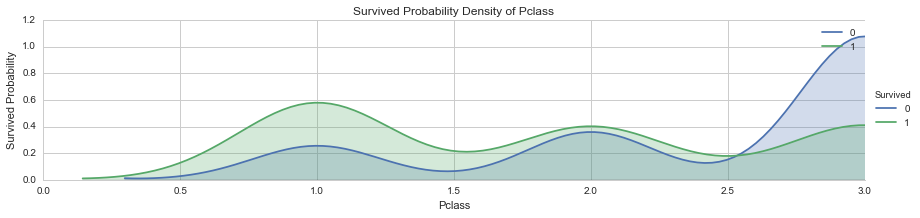

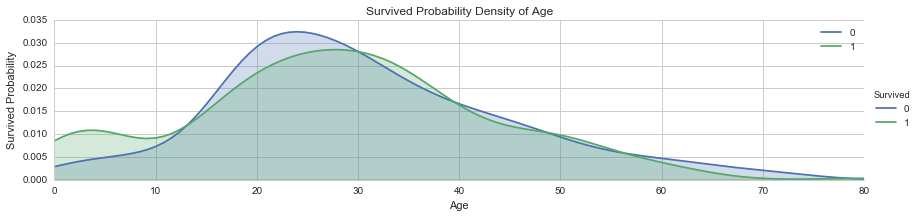

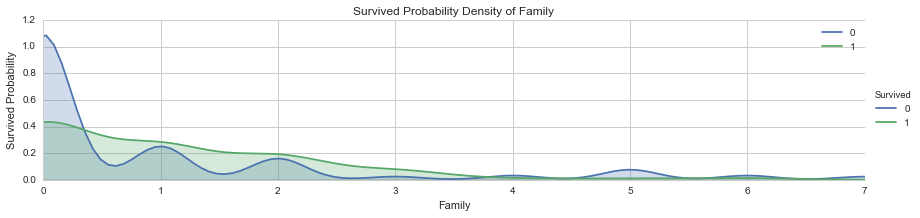

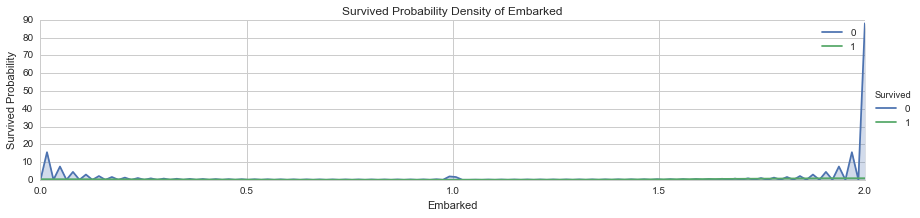

In [115]:
print "Top features", features['Feature'].values

for feature in features['Feature']:
    plot_survival_rate(data=titanic_df, key='Survived', feature=feature)

In [132]:
# Pearson product-moment correlation coefficient of Fare and Pclass
np.corrcoef(titanic_df['Fare'].values, titanic_df['Pclass'].values)[0, 1]

-0.55289322064575974

## Conclustion

### Answers to Questions
#### 1. What are the most important factors for survival rate?
Based on investigation of single feature and random forest learning, the top features are **`'Sex' 'Fare' 'Pclass' 'Age' 'Family' 'Embarked'`** in decreasing order of importance.

**The tentative interpretation is as following.**

- `Female` passengers may get help from `Male` passengers during rescue.
- First class (`Pclass=1`) passengers may have better access to emergent routes due to better facility or less crowd. The `Fare` feature maybe correlated with `Pclass` and other features, making it more difficult to intepret.
- `Age` shows that 20-40 years old adult may have more physical strength during the disaster.
- Passengers with less than 4 family member with them have larger chance to survive, probabaly becuase two young adult could help one or two kids or the elders.
- We don't have enough information to intepret the affect of `Embarked` location.


#### 2. What is the profile of the person most likely to survive?
From previous analysis, one possible profile of most probable surviver is as following.
- A 1st class female passenger aged at 27 travelling without or with one or two family members.
